# 6.5.1 Subset Selection Methods

## Best Subset Selection
Here we apply the best subset selection approach to the `Hitters` data. We wish to predict a baseball player's `Salary` variable is missing for some of the players. The `is.na()` function can be used to identify the missing observations. It returns a vector of the same length as the input vector, with a `TRUE` for any elements that are missing, and a `FALSE` for non-missing elements. The `sum()` function can then be used to count all of the missing elements.

In [1]:
library(ISLR2)
View(Hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N


In [2]:
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [3]:
dim(Hitters)

[1] 322  20

In [4]:
sum(is.na(Hitters$Salary))

[1] 59

Hence we see that `Salary` is missing for $59$ players. The `na.omit()` function removes all of the rows that have missing values in any variable.

In [5]:
Hitters <- na.omit(Hitters)
dim(Hitters)

[1] 263  20

In [6]:
sum(is.na(Hitters))

[1] 0

The `regsubsets()` function (part of the `leaps` library) performs best subset selection by identifying the best model that contains a given number of predictors, where _best_ is quantified using RSS. The syntax is the same as for `lm()`. The `summary()` command outputs the best set of variables for each model size.

In [7]:
library(leaps)

In [8]:
regfit.full <- regsubsets(Salary ~ ., Hitters)

In [9]:
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

An asterisk indicates that a given variable is included in the corresponding model. For instance, this output indicates that the best two-variable model contains only `Hits` and `CRBI`. By default, `regsubsets()` only reports results up to the best eight-variable model. But the `nvmax` option can be used in order to return as many variables as are desired. Here we fit up to a 19-variable model.

In [10]:
regfit.full <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)
reg.summary <- summary(regfit.full)

The `summary()` function also returns $R^2$, RSS, adjusted $R^2$, $C_p$, and BIC. We can examine these to try to select the _best_ overall model.

In [11]:
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

For instance, we see that the $R^2$ statistic increases from $32\%$, when only one variable is included in the model, to almost $55\%$, when all variables are included. As expected, the $R^2$ statistic increases monotonically as more variables are included.

In [12]:
reg.summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

The `points()` command works like the `plot()` command, except that it puts points on a plot that has already been created, instead of creating a new plot. The `which.max()` function can be used to identify the location of the maximum point of a vector. We will now plot a red dot to indicate the model with the largest adjusted $R^2$ statistic.

[1] 11

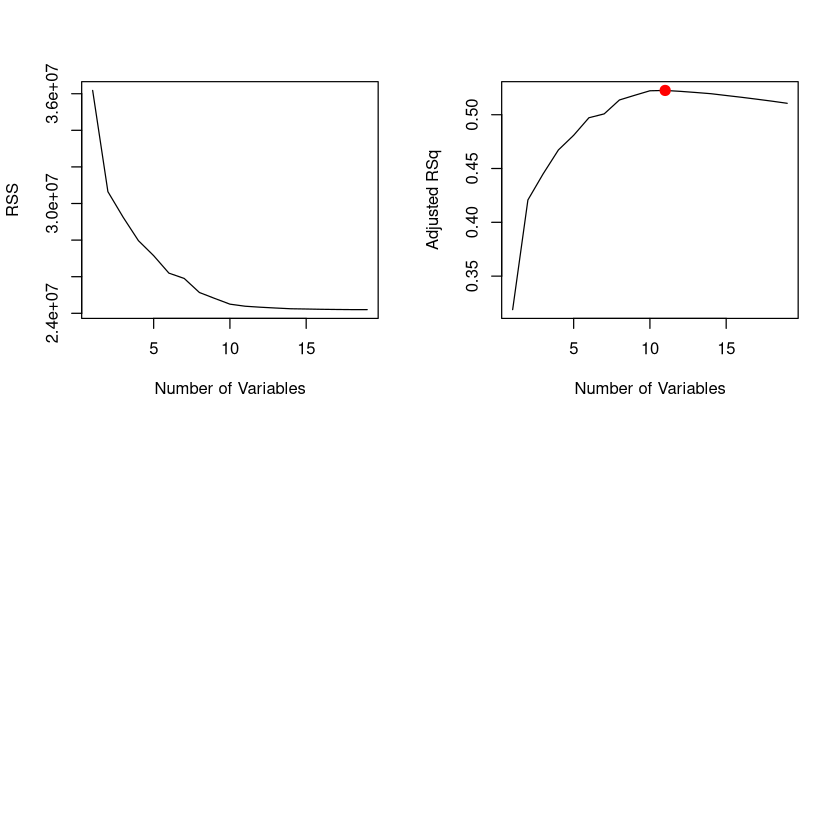

In [13]:
par(mfrow = c(2, 2))
plot(reg.summary$rss, xlab = "Number of Variables",
     ylab = "RSS", type = "l")
plot(reg.summary$adjr2, xlab = "Number of Variables",
     ylab = "Adjusted RSq", type = "l")
which.max(reg.summary$adjr2)
points(11, reg.summary$adjr2[11], col = "red", cex = 2, pch = 20)

In a similar fashion we can plot the $C_p$ and BIC statistics, and indicate the models with the smallest statistic using `which.min()`.

[1] 10

[1] 6

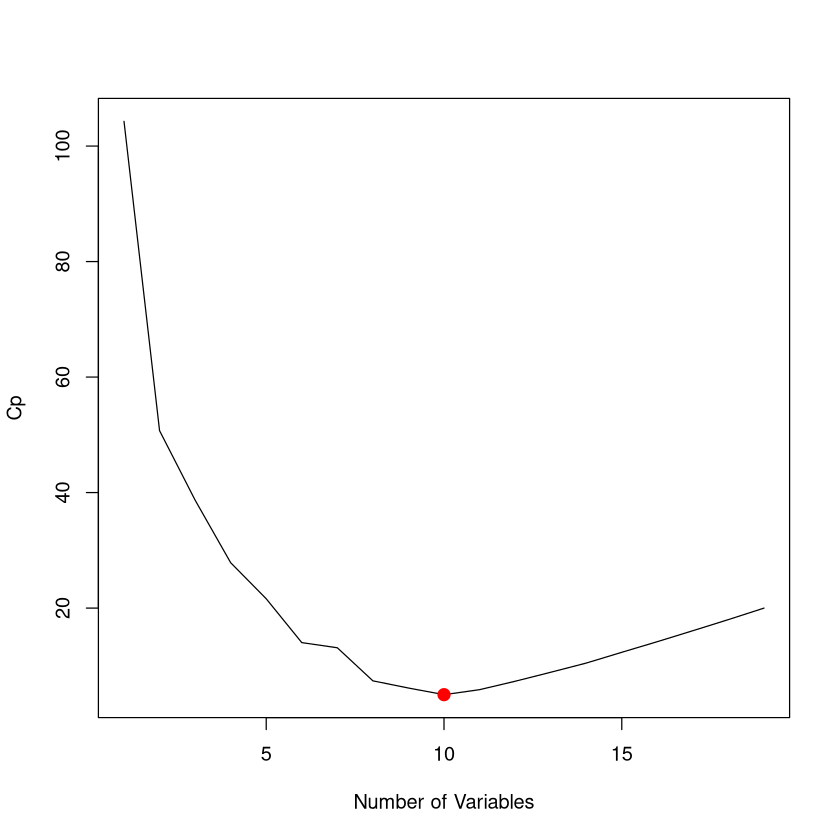

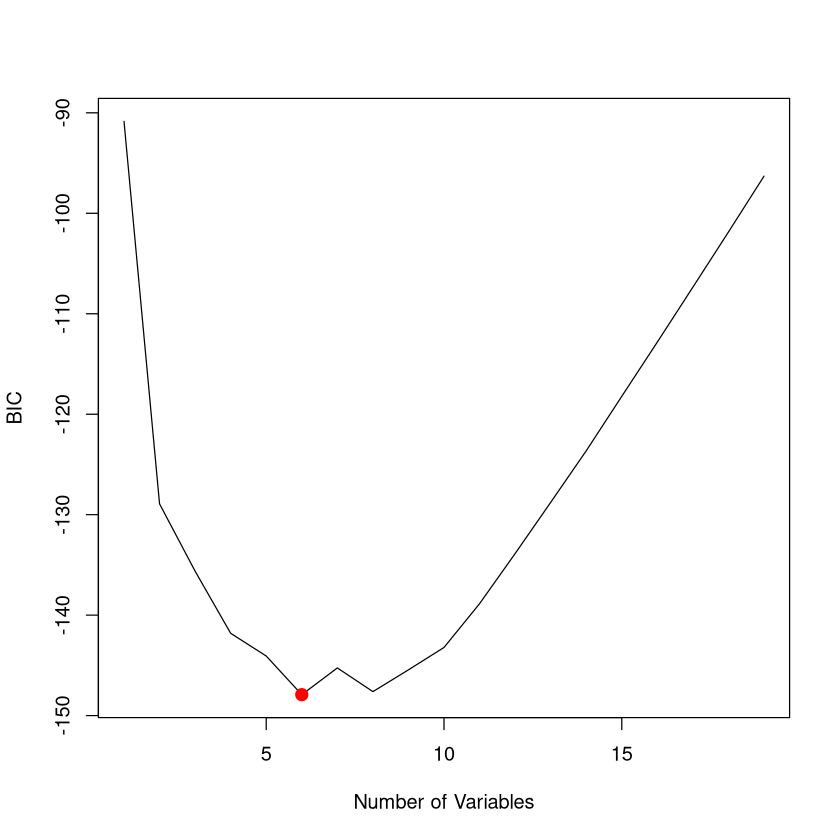

In [14]:
plot(reg.summary$cp, xlab = "Number of Variables",
     ylab = "Cp", type = "l")
which.min(reg.summary$cp)
points(10,reg.summary$cp[10], col = "red", cex = 2, pch = 20)
which.min(reg.summary$bic)
plot(reg.summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(6, reg.summary$bic[6], col = "red", cex = 2, pch = 20)

The `regsubsets()` function has a built-in `plot()` command which can be used to display the selected variables for hte best model with a given number of predictors, ranked according to the BIC, $C_p$, adjusted $R^2$, or AIC. To find out more about this function, type `?plot.regsubsets`.

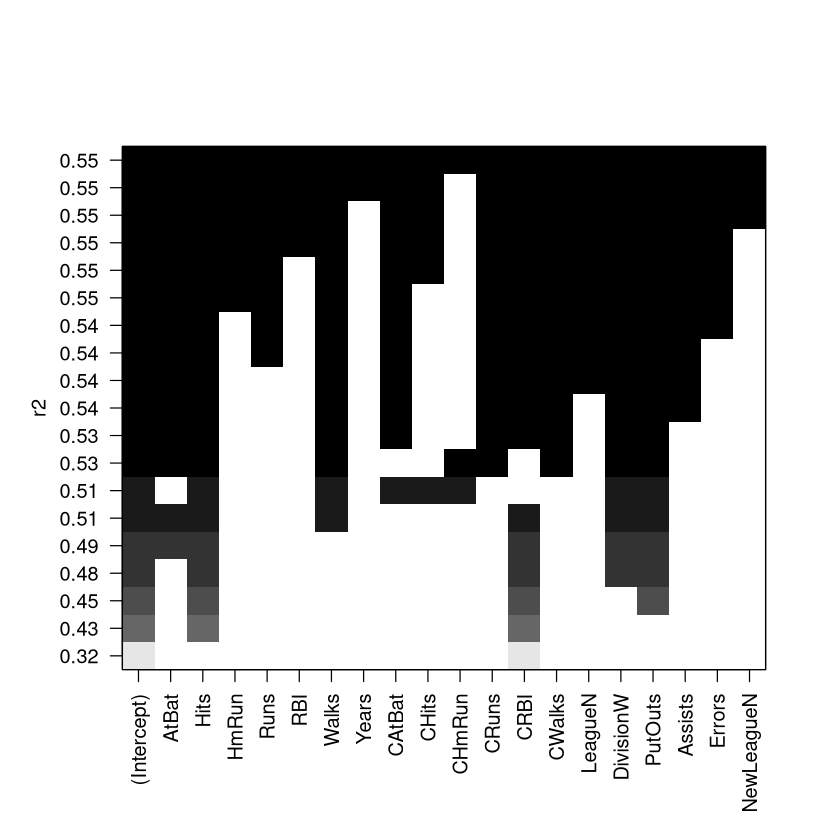

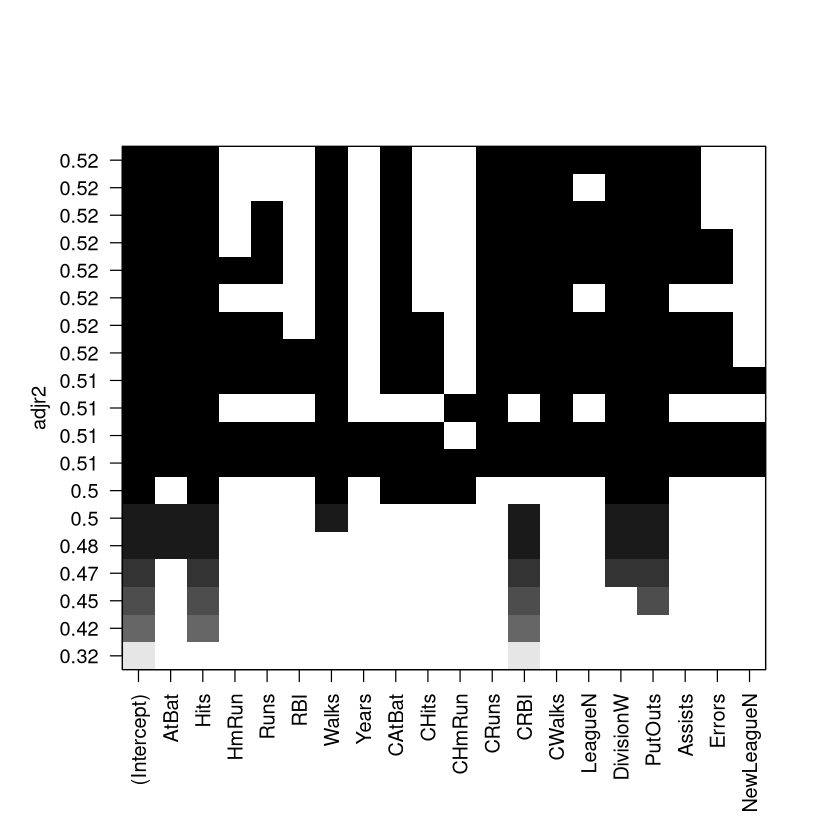

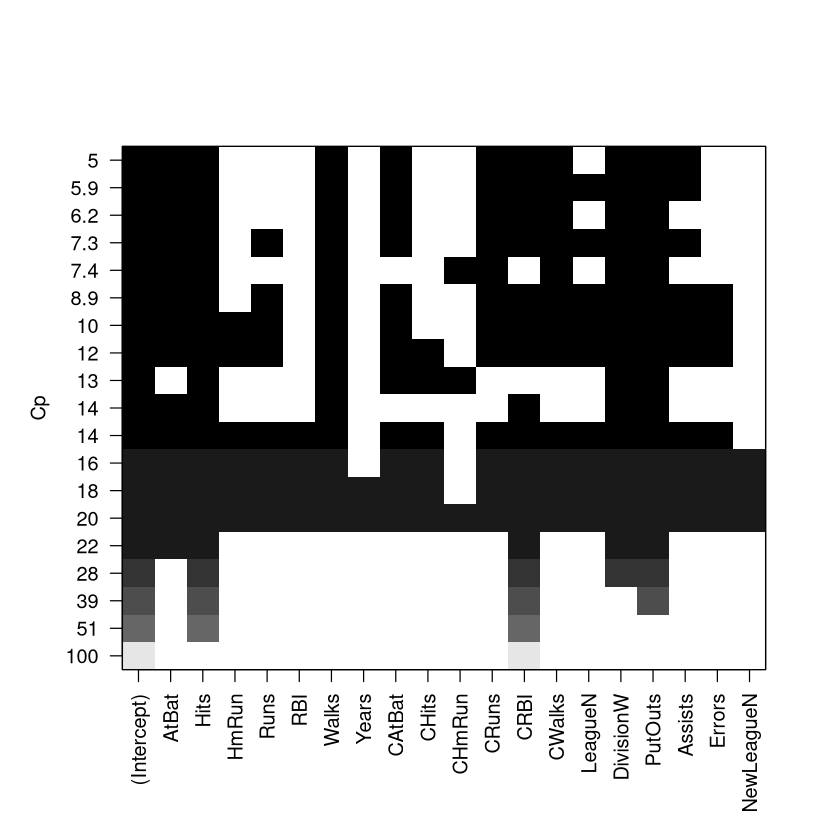

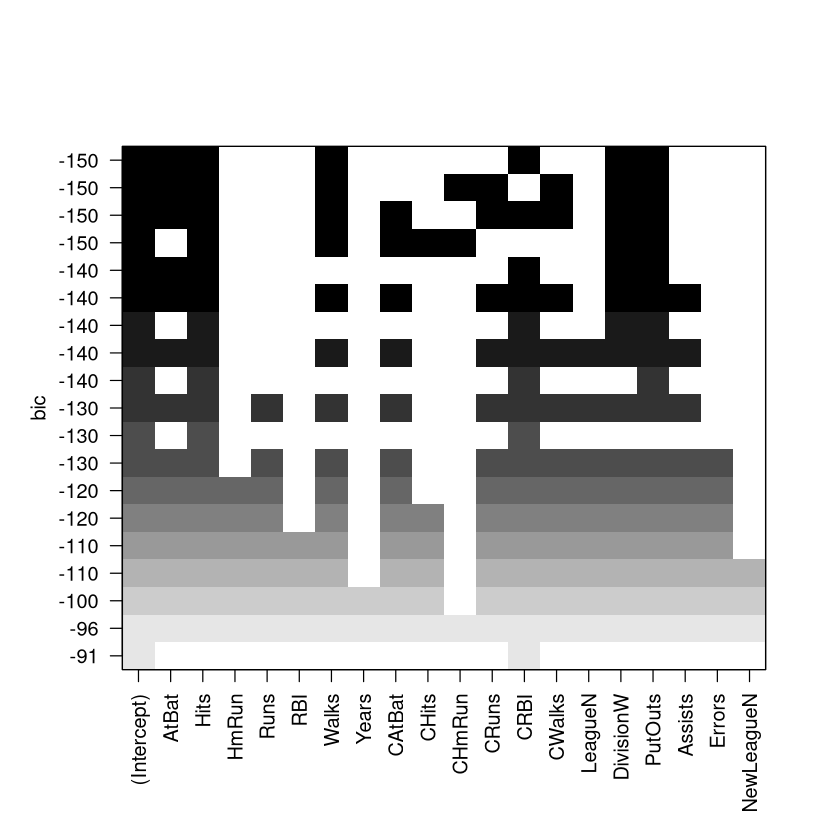

In [15]:
plot(regfit.full, scale = "r2")
plot(regfit.full, scale = "adjr2")
plot(regfit.full, scale = "Cp")
plot(regfit.full, scale = "bic")

The top row of each plot contains a black square for each variable selected according to the optimal model associated with that statistic. For instance w see that several models share a BIC close to $-150$. However, the model with the lowest BIC is the six-variable model that contains only `AtBat`,`Hits`,`Walks`,`CRBI`,`DivisionW`, and `PutOuts`. We can use the `coef()` function to see the coefficient estimates associated with this model.

In [16]:
coef(regfit.full, 6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

## Forward and Backward Stepwise
We can also use the `regsubsets()` function to perform forward stepwise or backward stepwise selection, using the argument `method = "forward"` or `method = "backward"`.

In [17]:
regfit.fwd <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
regfit.bwd <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")

For instance, we see that using forward stepwise selection, the best one-variable model contains only `CRBI`, and the best two-variable model additionally includes `Hits`. For this data, the best one-variable through six-variable models are each identical for best subset and forward selection. However, the best seven-variable models identified by forward stepwise selection, backward stepwise selection, and best subset selection are different.

In [18]:
coef(regfit.full, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

In [19]:
coef(regfit.fwd, 7)

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

In [20]:
coef(regfit.bwd, 7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

## Choosing Among Models Using the Validation-Set Approach and Cross-Validation
We just saw that it is possible to choose among a set of models of different sizes using $C_p$, BIC, and adjusted $R^2$. We will now consider how to do this using the validation set and cross-validation approaches.  

In order for these approaches to yield accurate estimates of the test error, we must use _only the training observations_ to perform all aspects of model-fitting&mdash;including variable selection. Therefore, the determination of which model of a given size is best must be made using _only the training observations_. This point is subtle but important. If the full data set is used to perform the best subset seleciton step, the validation set errors and cross-validation errors that we obtain will not be accurate estimates of the test error.  

In order to use the validation set approach, we begin by splitting the observations into a training set and a test set. We do this by creating a random vector, `train`, of elements equal to `TRUE` if the corresponding observation is in the training set, and `FALSE` otherwise. The vector `test` has a `TRUE` if the observation is in the test set, and a `FALSE` otherwise. Note the `!` in the command to create `test` causes `TRUE`s to be switched to `FALSE`s and vice versa. We also set a random seed so that the user will obtain the same training set/test set split.

In [21]:
set.seed(1)
train <- sample(c(TRUE, FALSE), nrow(Hitters), replace = TRUE)
test <- (!train)

Now, we apply `regsubsets()` to the  training set in order to perform best subset selection.

In [22]:
regfit.best <- regsubsets(Salary ~ ., data = Hitters[train,], nvmax = 19)

Notice that we subset the `Hitters` data frame directly in the call in order to access only the training subset of the data, using the expression `Hitters[train,]`. We now compute the validation set error for the best model of each model size. We first make a model matrix from the test data.

In [23]:

test.mat <- model.matrix(Salary ~ ., data = Hitters[test,])

The `model.matrix()` function is used in many regression packages for building an "X" matrix from data. Now we run a loop, and for each size `i`, we extract the coefficients from `regfit.best` for the best model of that size, multiply them into the appropriate columns of the test model matrix to form the predictions, and compute the test MSE.

In [24]:
val.errors <- rep(NA, 19)
for (i in 1:19) {
    coefi <- coef(regfit.best, id = i)
    pred <- test.mat[, names(coefi)] %*% coefi
    val.errors[i] <- mean((Hitters$Salary[test] - pred)^2)
}

We find that the best model is the one that contains seven variables.

In [25]:
val.errors

[1] 164377.3 144405.5 152175.7 145198.4 137902.1 139175.7 126849.0 136191.4
 [9] 132889.6 135434.9 136963.3 140694.9 140690.9 141951.2 141508.2 142164.4
[17] 141767.4 142339.6 142238.2

In [26]:
which.min(val.errors)

[1] 7

In [27]:
coef(regfit.best, 7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
  67.1085369   -2.1462987    7.0149547    8.0716640    1.2425113   -0.8337844 
   DivisionW      PutOuts 
-118.4364998    0.2526925

This was a little tedious, partly because there is no `predict()` method for `regsubsets()`. Since we will be using this function again, we can capture our steps above and write out our own predict method.

In [28]:
predict.regsubsets <- function(object, newdata, id, ...) {
    form <- as.formula(object$call[[2]])
    mat <- model.matrix(form, newdata)
    coefi <- coef(object, id = id)
    xvars <- names(coefi)
    mat[, xvars] %*% coefi
}

Our function pretty much mimics what we did above. The only complex part is how we extract the formula used in the call to `regsubsets()`. We demonstrate how we use this function below, when we do cross-validation.  

Finally, we perform best subset selection on the full data set, and select the best seven-variable model. It is important that we make use of the full data set in order to obtain more accurate coefficient estimates. Note that we perform best subset selection on the full data set and select the best seven-variable model, rather than simply using the variables that were obtained from the training set, because the best seven-variable model on the full data set may differ from the corresponding model on the training set.

In [29]:
regfit.best <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)

In [30]:
coef(regfit.best, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

In fact, we see that the best seven-variable model on the full data set has a different set of variables than the best seven-variable model on the training set.  

We now try to choose among the models of different sizes using cross-valiation. This approach is somewhat involved, as we must perform best subset selection _within each of the k training sets_. Despite this, we see that with its clever subsetting syntax, `R` makes this job quite easy. First, we create a vector that allocaes each observation to one of $k=10$ folds, and we create a matrix in which we will store the results.

In [31]:
k <- 10
n <- nrow(Hitters)
set.seed(1)
folds <- sample(rep(1:k, length = n))
cv.errors <- matrix(NA, k, 19,
                    dimnames = list(NULL, paste(1:19)))

Now we write  for loop that performs cross-validation. In the _j_ th fold, the elements of `folds` that equal `j` are in the test set, and the remainder are in the training set. We make our predictions for each model size (using our new `predict()` method), compute the test errors on the appropriate subset, and store them in the appropriate slot in the matrix `cv.errors`. Note that in the following code `R` will automatically use our `predict.regsubsets()` function when we call `predict()` because the `best.fit` object has class `regsubsets`.

In [32]:
for (j in 1:k) {
    best.fit <- regsubsets(Salary ~ .,
                           data = Hitters[folds != j,],
                           nvmax = 19)
    for (i in 1:19) {
        pred <- predict(best.fit, Hitters[folds == j,], id = i)
        cv.errors[j, i] <-
          mean((Hitters$Salary[folds == j] - pred)^2)
    }
}

This has given us a $10\times19$ matrix, of which the $(j,i)$th element corresponds to the test MSE for the _j_ th cross-validation fold for the best _i_-variable model. We use the `apply()` function to average over the columns of this matrix in order to obtain a vector for which the _i_ th element is the cross-validation error for the _i_-variable model.

In [33]:
mean.cv.errors <- apply(cv.errors, 2, mean)
mean.cv.errors

1        2        3        4        5        6        7        8 
143439.8 126817.0 134214.2 131782.9 130765.6 120382.9 121443.1 114363.7 
       9       10       11       12       13       14       15       16 
115163.1 109366.0 112738.5 113616.5 115557.6 115853.3 115630.6 116050.0 
      17       18       19 
116117.0 116419.3 116299.1

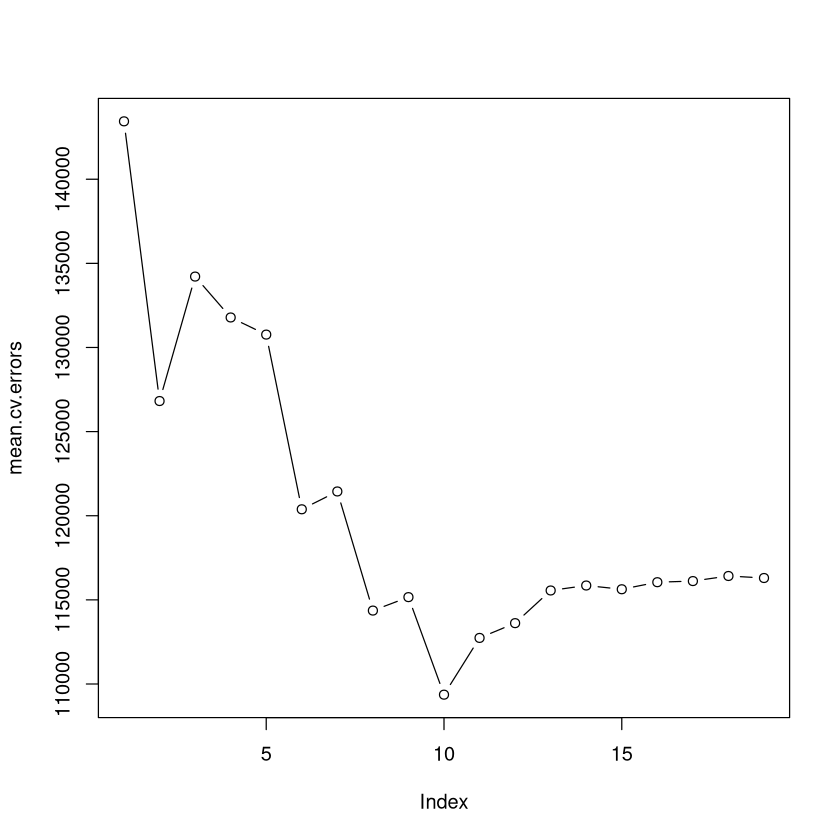

In [34]:
par(mfrow = c(1,1))
plot(mean.cv.errors, type = "b")

We see that cross-validation selects a 10-variable model. We now perform best subset selection on the full data set in order to obtain the 10-variable model.

In [35]:
reg.best <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)
coef(reg.best, 10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680